In [9]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [10]:
def get_data(Xy_list):
    X = pd.DataFrame()
    
    for Xy in Xy_list:
        X = pd.concat([X, Xy], axis=0)

    X = X.drop(['target'], axis=1)

    return X

In [11]:
DATA_PATH_CLUSTERED = f'../../../Results/Selecting_Features/FoI_C_S_Xy_PoC_1584/120/'

CSV_names = np.asarray(os.listdir(DATA_PATH_CLUSTERED))
Xy_clustered = list()

for i, current_csv_name in enumerate(CSV_names):

    Xy_clustered.append(pd.read_csv(f'{DATA_PATH_CLUSTERED}{current_csv_name}'))

X = get_data(Xy_clustered)

In [12]:
from sklearn.decomposition import PCA

reducer = PCA(svd_solver='full')
reducer.fit(X)
variance_ratio = reducer.explained_variance_ratio_

cumulative_variance = np.cumsum(variance_ratio)

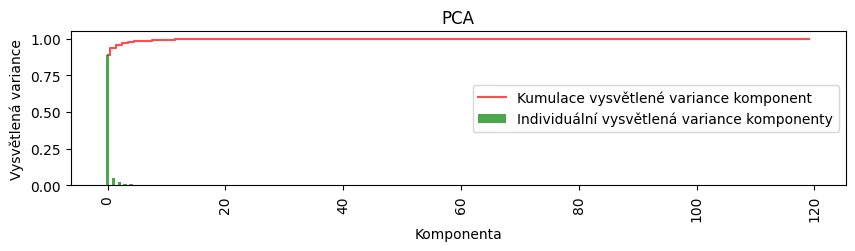

In [13]:
x_axis = np.linspace(0,len(variance_ratio)-1,len(variance_ratio))

fig = plt.figure(figsize = (10, 2))
 
plt.bar(x_axis, variance_ratio, width = 0.6, alpha=0.7, label='Individuální vysvětlená variance komponenty', color='green')
plt.step(x_axis, cumulative_variance, where='mid', alpha=0.7, label='Kumulace vysvětlené variance komponent', color='red')

plt.xticks(rotation = 90)

plt.title(f'PCA')
plt.ylabel('Vysvětlená variance')
plt.xlabel('Komponenta')
plt.legend(loc='center right')
plt.show()

In [14]:
desired_cumulative_variance_1 = 0.95
desired_cumulative_variance_2 = 0.99

target_dimension_1 = np.argmax(cumulative_variance >= desired_cumulative_variance_1) + 1
target_dimension_2 = np.argmax(cumulative_variance >= desired_cumulative_variance_2) + 1

print(f'Target dimension for comulative variance equal to {desired_cumulative_variance_1} is {target_dimension_1}')
print(f'Target dimension for comulative variance equal to {desired_cumulative_variance_2} is {target_dimension_2}')

Target dimension for comulative variance equal to 0.95 is 3
Target dimension for comulative variance equal to 0.99 is 10


# Plot do diplomky

In [15]:
from sklearn.datasets import fetch_openml

boston_dataset = fetch_openml(data_id=531)

X = boston_dataset.data

from sklearn.decomposition import PCA

reducer = PCA(svd_solver='full')
reducer.fit(X)
variance_ratio = reducer.explained_variance_ratio_

cumulative_variance = np.cumsum(variance_ratio)

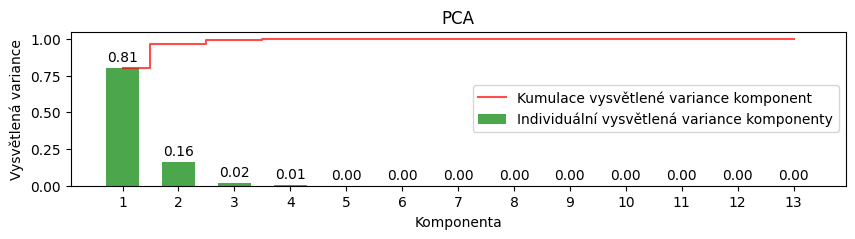

In [16]:
x_axis = np.linspace(0,len(variance_ratio)-1,len(variance_ratio)) + 1

fig = plt.figure(figsize = (10, 2))
 
bars = plt.bar(x_axis, variance_ratio, width = 0.6, alpha=0.7, label='Individuální vysvětlená variance komponenty', color='green')
plt.step(x_axis, cumulative_variance, where='mid', alpha=0.7, label='Kumulace vysvětlené variance komponent', color='red')

for bar, value in zip(bars, variance_ratio):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.12, f'{value:.2f}', ha='center', va='top', color='black')

plt.xticks(x_axis)

plt.title(f'PCA')
plt.ylabel('Vysvětlená variance')
plt.xlabel('Komponenta')
plt.legend(loc='center right')
plt.show()